In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.stats import pearsonr
import nibabel as nb
import seaborn as sns
import plot_funcs

### get T1w-T2w-Ratio for one subject

In [2]:
workdir   = '../data/bladesMniGifti_T1wT2w/'
subjID    = '100206'
vol2hipp  = os.path.join(workdir, 'HCP_%s_L_SUB_skelFinal.shape.gii' % (subjID))

# read data from the gifti file
qc_data = nb.load(vol2hipp).agg_data()

In [3]:
qc_data.shape

(1024,)

In [4]:
np.log10(qc_data).min(), np.log10(qc_data).max() 

(0.12900682, 0.5380561)

### get subject id's

In [5]:
# get HCP - S900 subject list        
subjlist = '../data/subjectListS900_QC_gr.txt'
f = open(subjlist); mylist = f.read().split("\n"); f.close() 
subjlist = joinedlist = mylist[:-1]

len(subjlist)

mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))


709


### get average T1w-T2w-Ratios across subjects

In [8]:
ddir = '../data/bladesMniGifti_T1wT2w/'

sumi = np.zeros((1024,))
j = 0
for subjID in mysubjects:
    vol2hipp  = os.path.join(ddir, 'HCP_%s_L_SUB_skelFinal.shape.gii' % (subjID))
    if os.path.isfile(vol2hipp): 
        qc_data   = nb.load(vol2hipp).agg_data()
        sumi += qc_data
        j += 1
    else:
        print(subjID)

avg = sumi / j

In [9]:
avg.min(), avg.max(), j

(1.6893644349699464, 2.5238820378299494, 709)

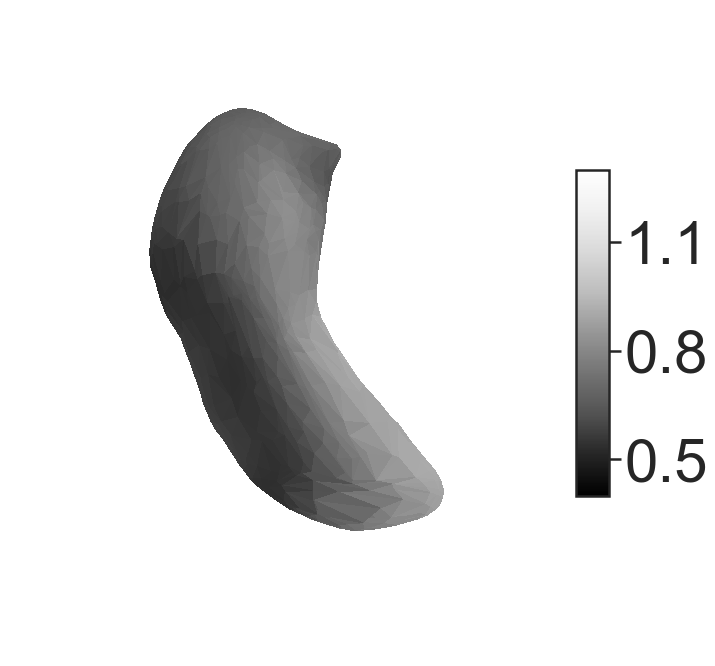

In [10]:
fig = plot_funcs.plot_surf(plot_funcs.xLSUB, 
                           plot_funcs.yLSUB, 
                           plot_funcs.zLSUB, 
                           plot_funcs.triLSUB, 
                           np.log(avg),
                           'Greys_r',
                           0.4, 1.3)


# correlate T1w-T2w-Ratios with Gradient 2

In [11]:
# get gradients

ddir = '../data/tout_group/'

h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left.h5'), 'r');

G1_LSUB = np.array(h1['gradients_'][0:1024,0])
G1_LCA = np.array(h1['gradients_'][1024:1024+2048,0])
G1_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,0])

G2_LSUB = np.array(h1['gradients_'][0:1024,1])
G2_LCA = np.array(h1['gradients_'][1024:1024+2048,1])
G2_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,1])

G3_LSUB = np.array(h1['gradients_'][0:1024,2])
G3_LCA = np.array(h1['gradients_'][1024:1024+2048,2])
G3_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,2])



In [12]:
pearsonr(np.log(avg), G2_LSUB)

(0.9256527282841368, 0.0)

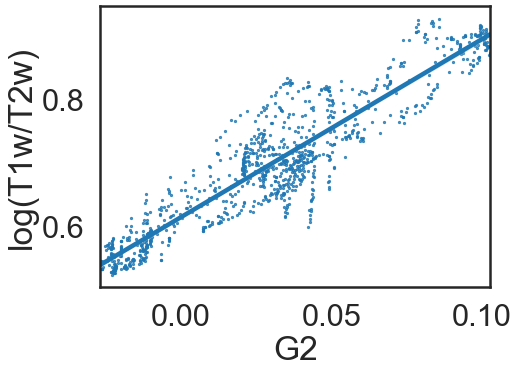

In [14]:
sns.set_context("poster", font_scale=1.4)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(G2_LSUB, np.log(avg),
                  scatter_kws={'s': 5})
                 
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/corr_t1wt2w_log_LSUB_G2.png")



### L_CA

In [17]:
ddir = '../data/bladesMniGifti_T1wT2w/'

sumi = np.zeros((2048,))
j = 0
for subjID in mysubjects:
    vol2hipp  = os.path.join(ddir, 'HCP_%s_L_CA_skelFinal.shape.gii' % (subjID))
    if os.path.isfile(vol2hipp): 
        qc_data   = nb.load(vol2hipp).agg_data()
        sumi += qc_data
        j += 1
    else:
        print(subjID)

avg = sumi / j

In [17]:
avg.min(), avg.max()

(1.5745954634608603, 3.59316311400431)

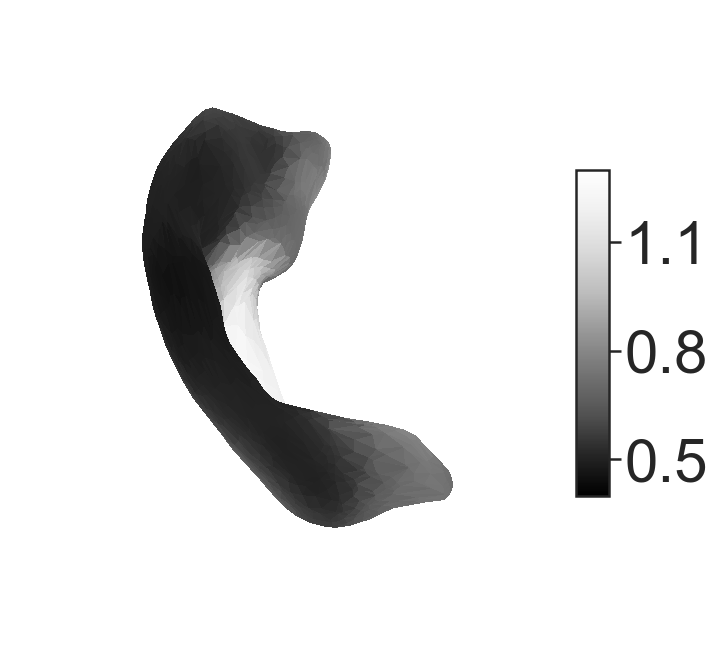

In [18]:
fig = plot_funcs.plot_surf(plot_funcs.xLCA, 
                           plot_funcs.yLCA, 
                           plot_funcs.zLCA, 
                           plot_funcs.triLCA, 
                           np.log(avg),
                           'Greys_r',
                           0.4, 1.3)

In [19]:
pearsonr(np.log(avg), G2_LCA)

(0.23290027230528834, 1.254163775763722e-26)

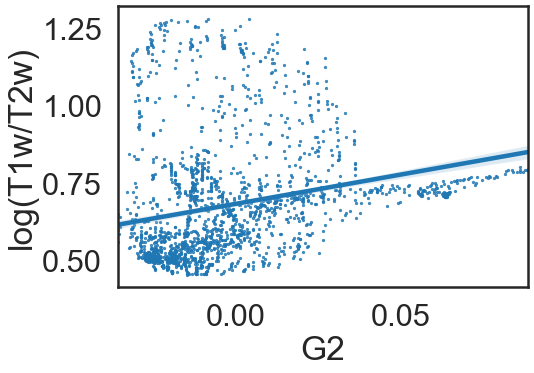

In [20]:
fig = plt.figure(figsize=(8,6));

ax  = sns.regplot(G2_LCA, np.log(avg),
                  scatter_kws={'s': 5})

ax.set(xlabel='G2', ylabel='log(T1w/T2w)')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/corr_t1wt2w_log_LCA_G2.png")

### LDG

In [21]:
ddir = '../data/bladesMniGifti_T1wT2w/'

sumi = np.zeros((1024,))
j = 0
for subjID in mysubjects:
    vol2hipp  = os.path.join(ddir, 'HCP_%s_L_DG_skelFinal.shape.gii' % (subjID))
    if os.path.isfile(vol2hipp): 
        qc_data   = nb.load(vol2hipp).agg_data()
        sumi += qc_data
        j += 1
    else:
        print(subjID)

avg = sumi / j

In [22]:
avg.min(), avg.max()

(1.5941865649310758, 1.7227601688906908)

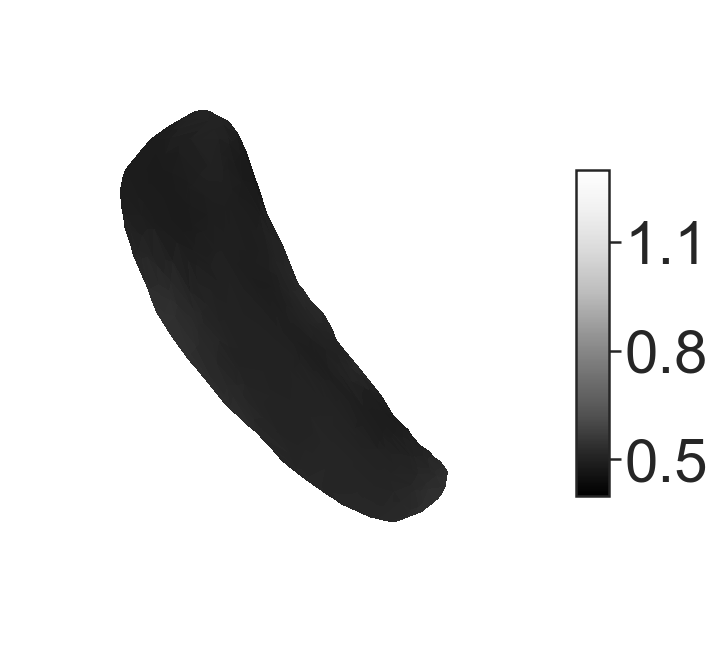

In [23]:
fig = plot_funcs.plot_surf(plot_funcs.xLDG, 
                           plot_funcs.yLDG, 
                           plot_funcs.zLDG, 
                           plot_funcs.triLDG, 
                           np.log(avg),
                           'Greys_r',
                           0.4, 1.3)

In [24]:
pearsonr(np.log(avg), G2_LDG)

(-0.009796454078338948, 0.7541962147530231)

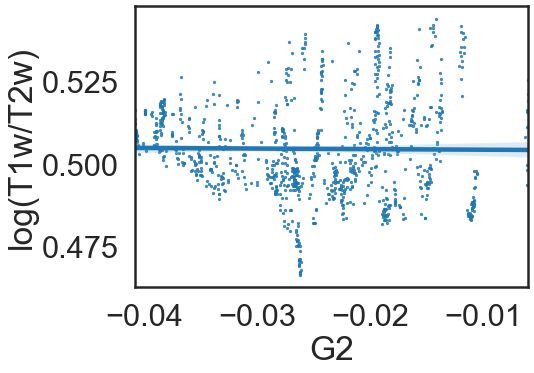

In [25]:
fig = plt.figure(figsize=(8,6));

ax  = sns.regplot(G2_LDG, np.log(avg),
                  scatter_kws={'s': 5})
                 
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/corr_t1wt2w_log_LDG_G2.png")

### Right Hemisphere, RSUB

In [26]:
# get gradients

ddir = '../data/tout_group/'

h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_right.h5'), 'r');

G1_RSUB = np.array(h1['gradients_'][0:1024,0])
G1_RCA = np.array(h1['gradients_'][1024:1024+2048,0])
G1_RDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,0])

G2_RSUB = np.array(h1['gradients_'][0:1024,1])
G2_RCA = np.array(h1['gradients_'][1024:1024+2048,1])
G2_RDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,1])

G3_RSUB = np.array(h1['gradients_'][0:1024,2])
G3_RCA = np.array(h1['gradients_'][1024:1024+2048,2])
G3_RDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,2])



In [27]:
ddir = '../data/bladesMniGifti_T1wT2w/'

sumi = np.zeros((1024,))
j = 0
for subjID in mysubjects:
    vol2hipp  = os.path.join(ddir, 'HCP_%s_R_SUB_skelFinal.shape.gii' % (subjID))
    if os.path.isfile(vol2hipp): 
        qc_data   = nb.load(vol2hipp).agg_data()
        sumi += qc_data
        j += 1
    else:
        print(subjID)

avg = sumi / j

In [28]:
avg.min(), avg.max()

(1.6538693543381684, 2.6208233979592372)

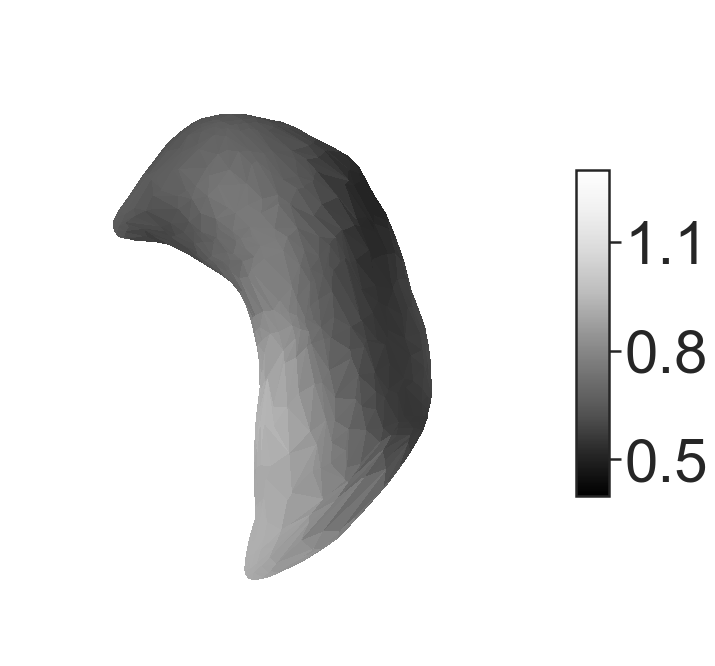

In [30]:
fig = plot_funcs.plot_surf(plot_funcs.xRSUB, 
                           plot_funcs.yRSUB, 
                           plot_funcs.zRSUB, 
                           plot_funcs.triRSUB, 
                           np.log(avg),
                           'Greys_r',
                           0.4, 1.3)

In [31]:
pearsonr(np.log(avg), G2_RSUB)

(0.8809163608746822, 0.0)

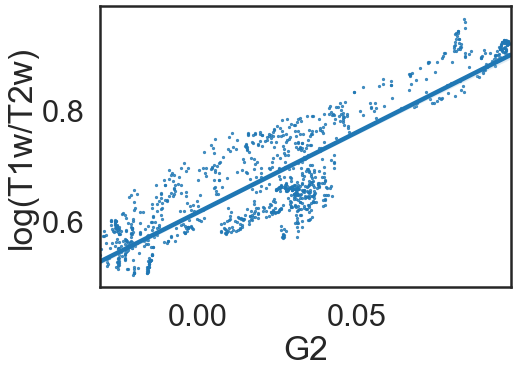

In [33]:
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(G2_RSUB, np.log(avg),
                  scatter_kws={'s': 5})
                 
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/corr_t1wt2w_log_RSUB_G2.png")


### RCA

In [34]:
ddir = '../data/bladesMniGifti_T1wT2w/'

sumi = np.zeros((2048,))
j = 0
for subjID in mysubjects:
    vol2hipp  = os.path.join(ddir, 'HCP_%s_R_CA_skelFinal.shape.gii' % (subjID))
    if os.path.isfile(vol2hipp): 
        qc_data   = nb.load(vol2hipp).agg_data()
        sumi += qc_data
        j += 1
    else:
        print(subjID)

avg = sumi / j

In [36]:
j, avg.min(), avg.max()

(709, 1.5518333997645735, 3.5438208099144637)

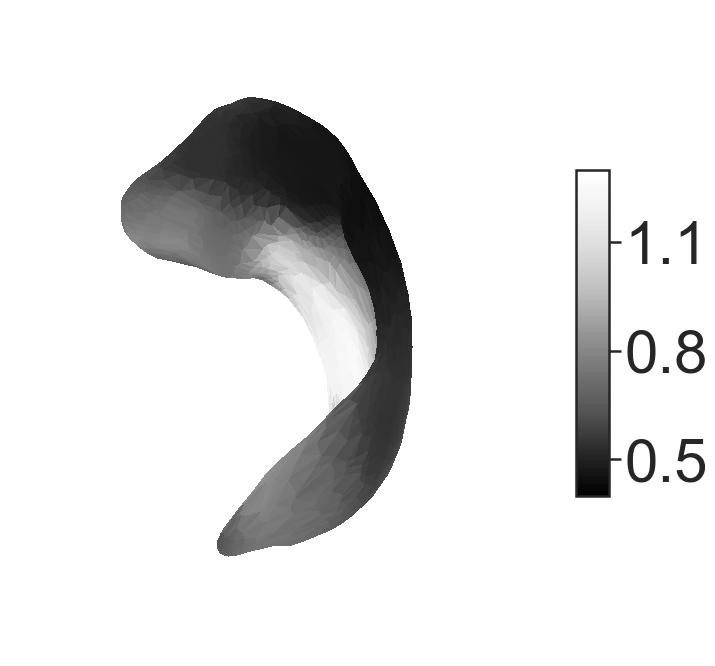

In [37]:
fig = plot_funcs.plot_surf(plot_funcs.xRCA, 
                           plot_funcs.yRCA, 
                           plot_funcs.zRCA, 
                           plot_funcs.triRCA, 
                           np.log(avg),
                           'Greys_r',
                           0.4, 1.3)

In [38]:
pearsonr(np.log(avg), G2_RCA)

(0.185536719031352, 2.5636350355186416e-17)

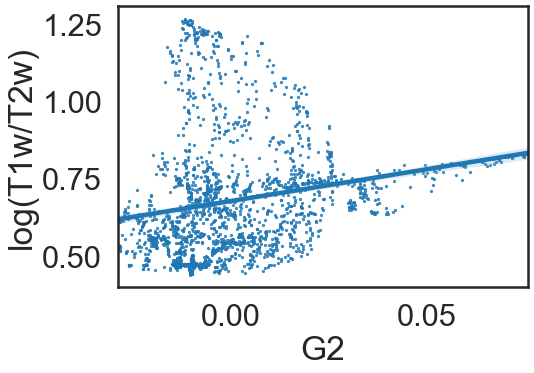

In [39]:
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(G2_RCA, np.log(avg),
                  scatter_kws={'s': 5})
                 
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/corr_t1wt2w_log_RCA_G2.png")



### RDG

In [40]:
ddir = '../data/bladesMniGifti_T1wT2w/'

sumi = np.zeros((1024,))
j = 0
for subjID in mysubjects:
    vol2hipp  = os.path.join(ddir, 'HCP_%s_R_DG_skelFinal.shape.gii' % (subjID))
    if os.path.isfile(vol2hipp): 
        qc_data   = nb.load(vol2hipp).agg_data()
        sumi += qc_data
        j += 1
    else:
        print(subjID)

avg = sumi / j

In [41]:
j, avg.min(), avg.max()

(709, 1.5742521292736231, 1.8106312381027447)

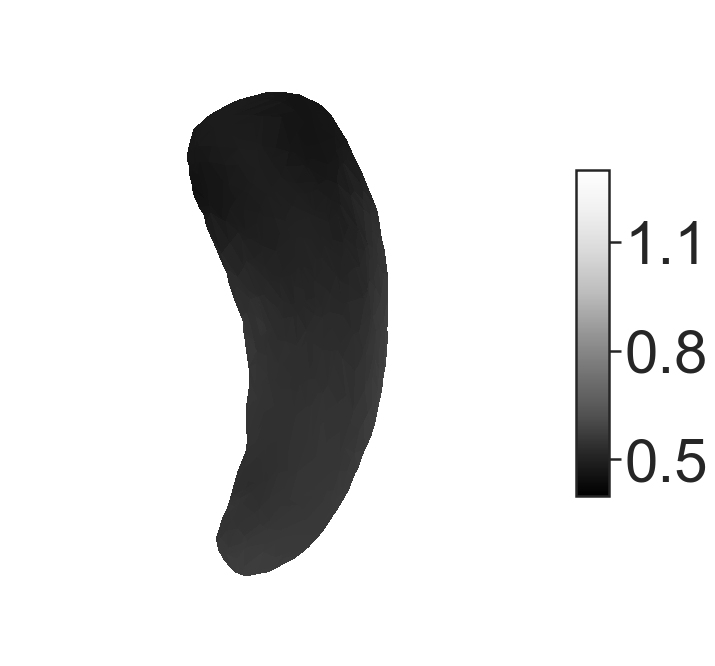

In [42]:
fig = plot_funcs.plot_surf(plot_funcs.xRDG, 
                           plot_funcs.yRDG, 
                           plot_funcs.zRDG, 
                           plot_funcs.triRDG, 
                           np.log(avg),
                           'Greys_r',
                           0.4, 1.3)

In [43]:
pearsonr(np.log(avg), G2_RDG)

(0.11321814108597195, 0.00028316483946063184)

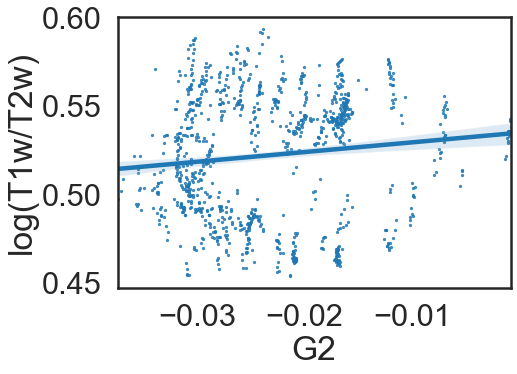

In [44]:
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(G2_RDG, np.log(avg),
                  scatter_kws={'s': 5})
                 
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/corr_t1wt2w_log_RDG_G2.png")



### individual level correlations (T1wT2w (smoothed) and G2 (smoothed))

In [48]:
mycols = ['tG2_LSUB', 'tG2_LCA', 'tG2_LDG', 'tG2_RSUB', 'tG2_RCA', 'tG2_RDG']

df = pd.DataFrame(index = mysubjects,
                  columns = mycols)

df.index.name = 'id'

In [49]:
#subjID = '100307'

j = 0

for subjID in mysubjects:

    tdir = '../data/tout_T1wT2w_msm50/'

    vol2hipp_LSUB  = os.path.join(tdir, 'HCP_%s_t1t2_sub_left.h5' % (subjID))
    h_LSUB  = h5py.File(vol2hipp_LSUB, 'r')
    t_LSUB  = np.array(h_LSUB[subjID])


    vol2hipp_LCA  = os.path.join(tdir, 'HCP_%s_t1t2_ca_left.h5' % (subjID))
    h_LCA   = h5py.File(vol2hipp_LCA, 'r')
    t_LCA   = np.array(h_LCA[subjID])

    vol2hipp_LDG  = os.path.join(tdir, 'HCP_%s_t1t2_dg_left.h5' % (subjID))
    h_LDG   = h5py.File(vol2hipp_LDG, 'r')
    t_LDG   = np.array(h_LDG[subjID])

    vol2hipp_RSUB  = os.path.join(tdir, 'HCP_%s_t1t2_sub_right.h5' % (subjID))
    h_RSUB  = h5py.File(vol2hipp_RSUB, 'r')
    t_RSUB  = np.array(h_RSUB[subjID])

    vol2hipp_RCA  = os.path.join(tdir, 'HCP_%s_t1t2_ca_right.h5' % (subjID))
    h_RCA   = h5py.File(vol2hipp_RCA, 'r')
    t_RCA   = np.array(h_RCA[subjID])

    vol2hipp_RDG  = os.path.join(tdir, 'HCP_%s_t1t2_dg_right.h5' % (subjID))
    h_RDG   = h5py.File(vol2hipp_RDG, 'r')
    t_RDG   = np.array(h_RDG[subjID])


    gdir = '../data/tout_hippoc_grad_flipped_msm50/'
    
    gfile_LSUB = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LSUB.h5'), 'r')
    g2_LSUB = np.array(gfile_LSUB[subjID])  
    gfile_LSUB.close()

    gfile_LCA = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LCA.h5'), 'r')
    g2_LCA = np.array(gfile_LCA[subjID])  
    gfile_LCA.close()

    gfile_LDG = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LDG.h5'), 'r')
    g2_LDG = np.array(gfile_LDG[subjID])  
    gfile_LDG.close()

    gfile_RSUB = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_RSUB.h5'), 'r')
    g2_RSUB = np.array(gfile_RSUB[subjID])  
    gfile_RSUB.close()

    gfile_RCA = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_RCA.h5'), 'r')
    g2_RCA = np.array(gfile_RCA[subjID])  
    gfile_RCA.close()

    gfile_RDG = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_RDG.h5'), 'r')
    g2_RDG = np.array(gfile_RDG[subjID])  
    gfile_RDG.close()
    
    if pearsonr(G2_LSUB, g2_LSUB)[0] < 0:
        j += 1
        print('bad')
 
    iC = df.index.get_loc(subjID)

    df.iloc[iC]['tG2_LSUB'] = pearsonr(np.log(t_LSUB), g2_LSUB)[0]
    df.iloc[iC]['tG2_LCA']  = pearsonr(np.log(t_LCA), g2_LCA)[0]
    df.iloc[iC]['tG2_LDG']  = pearsonr(np.log(t_LDG), g2_LDG)[0]
    df.iloc[iC]['tG2_RSUB'] = pearsonr(np.log(t_RSUB), g2_RSUB)[0]
    df.iloc[iC]['tG2_RCA']  = pearsonr(np.log(t_RCA), g2_RCA)[0]
    df.iloc[iC]['tG2_RDG']  = pearsonr(np.log(t_RDG), g2_RDG)[0]

bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


In [50]:
j

22

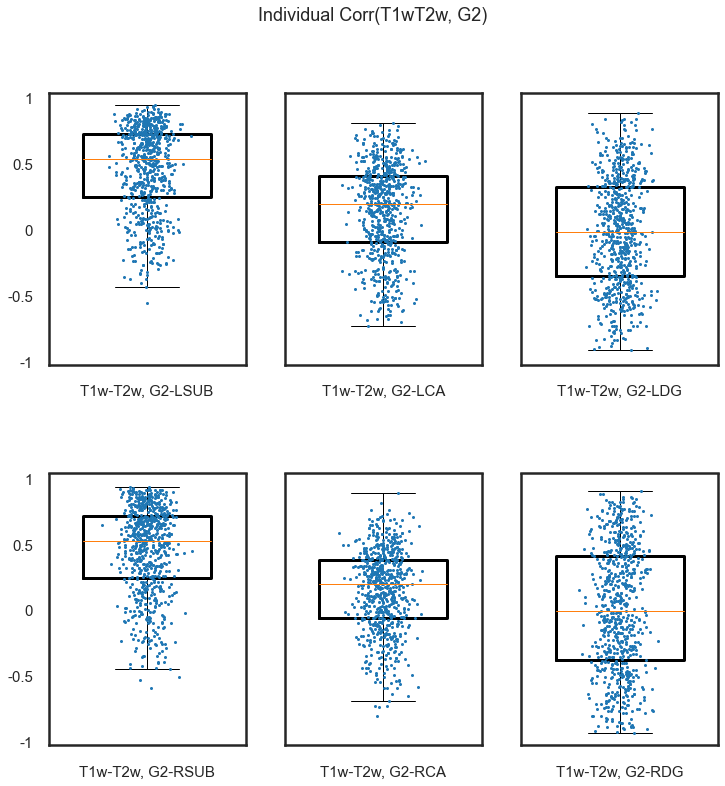

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,12), sharey=True)

axes[0,0].boxplot(df['tG2_LSUB'], showfliers=False,
                   widths = 0.65,
                   boxprops = dict(linestyle='-', linewidth = 3))
axes[0,0].set_xlabel('T1w-T2w, G2-LSUB', fontsize=15)
axes[0,0].plot(np.random.normal(1, 0.07, len(df['tG2_LSUB'])), df['tG2_LSUB'], 
               marker="o", linestyle="None", markersize=2)

axes[0,1].boxplot(df['tG2_LCA'], showfliers=False,
                   widths = 0.65,
                   boxprops = dict(linestyle='-', linewidth = 3))
axes[0,1].set_xlabel('T1w-T2w, G2-LCA', fontsize=15)
axes[0,1].plot(np.random.normal(1, 0.07, len(df['tG2_LCA'])), df['tG2_LCA'], 
               marker="o", linestyle="None", markersize=2)

axes[0,2].boxplot(df['tG2_LDG'], showfliers=False,
                   widths = 0.65,
                   boxprops = dict(linestyle='-', linewidth = 3))
axes[0,2].set_xlabel('T1w-T2w, G2-LDG', fontsize=15)
axes[0,2].plot(np.random.normal(1, 0.07, len(df['tG2_LDG'])), df['tG2_LDG'], 
               marker="o", linestyle="None", markersize=2)

axes[1,0].boxplot(df['tG2_RSUB'], showfliers=False,
                   widths = 0.65,
                   boxprops = dict(linestyle='-', linewidth = 3))
axes[1,0].set_xlabel('T1w-T2w, G2-RSUB', fontsize=15)
axes[1,0].plot(np.random.normal(1, 0.07, len(df['tG2_RSUB'])), df['tG2_RSUB'], 
               marker="o", linestyle="None", markersize=2)

axes[1,1].boxplot(df['tG2_RCA'], showfliers=False,
                   widths = 0.65,
                   boxprops = dict(linestyle='-', linewidth = 3))
axes[1,1].set_xlabel('T1w-T2w, G2-RCA', fontsize=15)
axes[1,1].plot(np.random.normal(1, 0.07, len(df['tG2_RCA'])), df['tG2_RCA'], 
               marker="o", linestyle="None", markersize=2)

axes[1,2].boxplot(df['tG2_RDG'], showfliers=False,
                   widths = 0.65,
                   boxprops = dict(linestyle='-', linewidth = 3))
axes[1,2].set_xlabel('T1w-T2w, G2-RDG', fontsize=15)
axes[1,2].plot(np.random.normal(1, 0.07, len(df['tG2_RDG'])), df['tG2_RDG'], 
               marker="o", linestyle="None", markersize=2)

for ax in axes.flat:
    ax.set_xticklabels([])
    ax.set_yticks([-1, -0.5,0, 0.5, 1]) 
    ax.set_yticklabels([-1, -0.5,0, 0.5, 1], fontsize=15)  
    #ax.yaxis.set_tick_params(width=50)

fig.suptitle('Individual Corr(T1wT2w, G2)', fontsize=18)
fig.subplots_adjust(hspace=0.4)

#fig.savefig('../figures/corr_t1wt2w_log_LSUB_G2_msm50_indiv.png',
#           dpi=200, format='png')


In [52]:
from scipy import stats

t, p = stats.wilcoxon(np.array(df['tG2_LSUB'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print( "'tG2_LSUB': t and p : ", t, p, 'median ', df['tG2_LSUB'].median())

t, p = stats.wilcoxon(np.array(df['tG2_LCA'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print( "'tG2_LCA': t and p : ", t, p, 'median ', df['tG2_LCA'].median())

t, p = stats.wilcoxon(np.array(df['tG2_LDG'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print( "'tG2_LDG': t and p : ", t, p, 'median ', df['tG2_LDG'].median())



t, p = stats.wilcoxon(np.array(df['tG2_RSUB'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print( "'tG2_RSUB': t and p : ", t, p, 'median ', df['tG2_RSUB'].median())

t, p = stats.wilcoxon(np.array(df['tG2_RCA'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print( "'tG2_RCA': t and p : ", t, p, 'median ', df['tG2_RCA'].median())

t, p = stats.wilcoxon(np.array(df['tG2_RDG'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)

print( "'tG2_RDG': t and p : ", t, p, 'median ', df['tG2_RDG'].median())



'tG2_LSUB': t and p :  8803.0 4.176863995588879e-102 median  0.5348064993964552
'tG2_LCA': t and p :  69371.0 4.0965019958184806e-25 median  0.1999071900489358
'tG2_LDG': t and p :  118950.0 0.20615138700332025 median  -0.01912153254766645
'tG2_RSUB': t and p :  10372.0 1.9426352992315195e-99 median  0.5283494094235415
'tG2_RCA': t and p :  60594.0 5.696491887928645e-33 median  0.19755259578000472
'tG2_RDG': t and p :  122608.0 0.5527072683765206 median  -0.006198935891738125


### check the node-wise correlations of T1w-T2w and G2

### G2 LSUB and T1w-T2w

In [53]:
mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))


tot_node_num = 1024 ## because subiculum has 1024 points 
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))
node_str[0], '....', node_str[-1]

mycols = node_str

df = pd.DataFrame(index = mysubjects,
                 columns = mycols)
df.index.name = 'id'


dg = pd.DataFrame(index = mysubjects,
                 columns = mycols)
dg.index.name = 'id'

709
1024


In [54]:
ddir = '../data/bladesMniGifti_T1wT2w/'
gdir = '../data/tout_hippoc_grad_flipped/'

for subjID in mysubjects:

    iC = df.index.get_loc(subjID)    
    vol2hipp  = os.path.join(ddir, 'HCP_%s_L_SUB_skelFinal.shape.gii' % (subjID))
    df.iloc[iC][node_str] = nb.load(vol2hipp).agg_data()
    
    iG = dg.index.get_loc(subjID)    
    gfile = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LSUB.h5'), 'r')
    g = np.array(gfile[subjID])  
    gfile.close()
    dg.iloc[iG][node_str] = g
    
    
    

In [55]:
R_ALL = np.zeros((tot_node_num))
P_ALL = np.zeros((tot_node_num))

j = 0
for node_j in node_str:
    R_ALL[j] = pearsonr(df[node_j], dg[node_j])[0]
    P_ALL[j] = pearsonr(df[node_j], dg[node_j])[1]

    j += 1

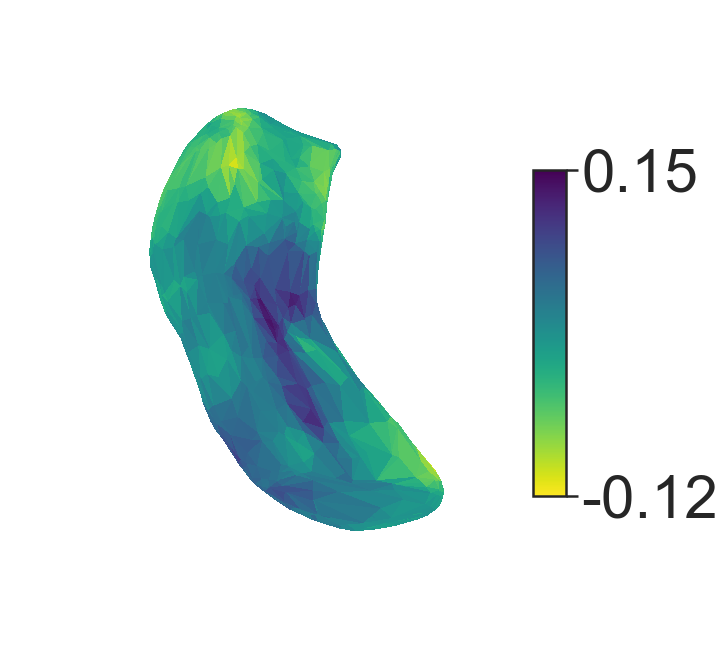

In [56]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   R_ALL,
                                   'viridis_r',
                                   R_ALL.min(), R_ALL.max())

#fig.savefig('../figures/nodewise_r_T_g2_lsub.png',
#            format='png',dpi=300)


In [57]:
R_ALL.min(), R_ALL.max()

(-0.12497010642917404, 0.149069310403159)

### G2 LCA and T1w-T2w

In [58]:
mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))

tot_node_num = 2048  
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))
node_str[0], '....', node_str[-1]

mycols = node_str

df = pd.DataFrame(index = mysubjects,
                 columns = mycols)
df.index.name = 'id'

dg = pd.DataFrame(index = mysubjects,
                 columns = mycols)
dg.index.name = 'id'

709
2048


In [59]:
ddir = '../data/bladesMniGifti_T1wT2w/'
gdir = '../data/tout_hippoc_grad_flipped/'

for subjID in mysubjects:

    iC = df.index.get_loc(subjID)    
    vol2hipp  = os.path.join(ddir, 'HCP_%s_L_CA_skelFinal.shape.gii' % (subjID))
    df.iloc[iC][node_str] = nb.load(vol2hipp).agg_data()
    
    iG = dg.index.get_loc(subjID)    
    gfile = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LCA.h5'), 'r')
    g = np.array(gfile[subjID])  
    gfile.close()
    dg.iloc[iG][node_str] = g
            

In [60]:
R_ALL = np.zeros((tot_node_num,))
P_ALL = np.zeros((tot_node_num,))

j = 0
for node_j in node_str:
    R_ALL[j] = pearsonr(df[node_j], dg[node_j])[0]
    P_ALL[j] = pearsonr(df[node_j], dg[node_j])[1]

    j += 1
    

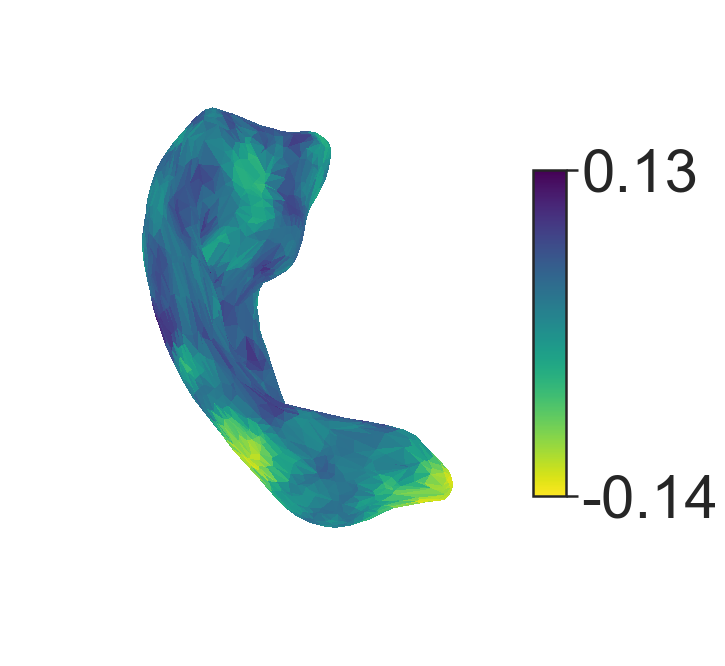

In [61]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   R_ALL,
                                   'viridis_r',
                                   R_ALL.min(), R_ALL.max())

#fig.savefig('../figures/nodewise_r_T_g2_lca.png',
#            format='png',dpi=300)


### G2 LDG vs T1w-T2w

In [62]:
mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))

tot_node_num = 1024  
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))
node_str[0], '....', node_str[-1]

mycols = node_str

df = pd.DataFrame(index = mysubjects,
                 columns = mycols)
df.index.name = 'id'

dg = pd.DataFrame(index = mysubjects,
                 columns = mycols)
dg.index.name = 'id'

709
1024


In [63]:
ddir = '../data/bladesMniGifti_T1wT2w/'
gdir = '../data/tout_hippoc_grad_flipped/'

for subjID in mysubjects:

    iC = df.index.get_loc(subjID)    
    vol2hipp  = os.path.join(ddir, 'HCP_%s_L_DG_skelFinal.shape.gii' % (subjID))
    df.iloc[iC][node_str] = nb.load(vol2hipp).agg_data()
    
    iG = dg.index.get_loc(subjID)    
    gfile = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LDG.h5'), 'r')
    g = np.array(gfile[subjID])  
    gfile.close()
    dg.iloc[iG][node_str] = g
    
    

In [64]:
R_ALL = np.zeros((tot_node_num,))
P_ALL = np.zeros((tot_node_num,))

j = 0
for node_j in node_str:
    R_ALL[j] = pearsonr(df[node_j], dg[node_j])[0]
    P_ALL[j] = pearsonr(df[node_j], dg[node_j])[1]

    j += 1

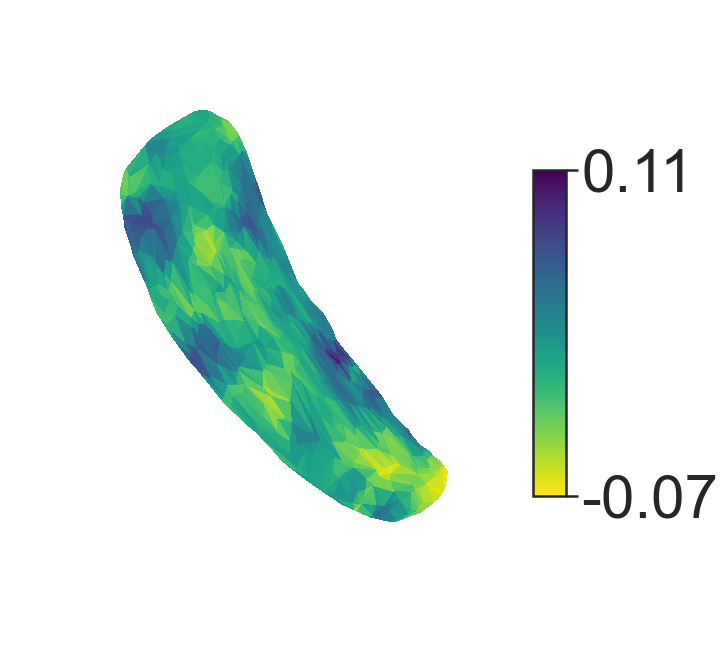

In [65]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   R_ALL,
                                   'viridis_r',
                                   R_ALL.min(), R_ALL.max())

#fig.savefig('../figures/nodewise_r_T_g2_ldg.png',
#            format='png',dpi=300)

### G2 RSUB and T1w-T2w

In [66]:
mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))

tot_node_num = 1024  
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))
node_str[0], '....', node_str[-1]

mycols = node_str

df = pd.DataFrame(index = mysubjects,
                 columns = mycols)
df.index.name = 'id'

dg = pd.DataFrame(index = mysubjects,
                 columns = mycols)
dg.index.name = 'id'

709
1024


In [67]:
ddir = '../data/bladesMniGifti_T1wT2w/'
gdir = '../data/tout_hippoc_grad_flipped/'

for subjID in mysubjects:

    iC = df.index.get_loc(subjID)    
    vol2hipp  = os.path.join(ddir, 'HCP_%s_R_SUB_skelFinal.shape.gii' % (subjID))
    df.iloc[iC][node_str] = nb.load(vol2hipp).agg_data()
    
    iG = dg.index.get_loc(subjID)    
    gfile = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_RSUB.h5'), 'r')
    g = np.array(gfile[subjID])  
    gfile.close()
    dg.iloc[iG][node_str] = g
    
    

In [68]:
R_ALL = np.zeros((tot_node_num,))
P_ALL = np.zeros((tot_node_num,))

j = 0
for node_j in node_str:
    R_ALL[j] = pearsonr(df[node_j], dg[node_j])[0]
    P_ALL[j] = pearsonr(df[node_j], dg[node_j])[1]

    j += 1

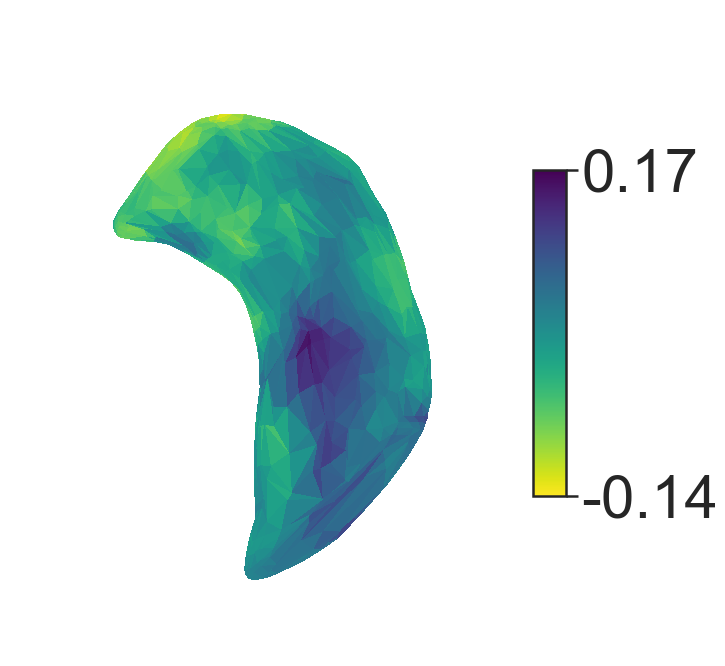

In [69]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                   plot_funcs.yRSUB, 
                                   plot_funcs.zRSUB, 
                                   plot_funcs.triRSUB, 
                                   R_ALL,
                                   'viridis_r',
                                   R_ALL.min(), R_ALL.max())

#fig.savefig('../figures/nodewise_r_T_g2_rsub.png',
#            format='png',dpi=300)

### G2 RCA and T1w-T2w

In [70]:
mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))

tot_node_num = 2048
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))
node_str[0], '....', node_str[-1]

mycols = node_str

df = pd.DataFrame(index = mysubjects,
                 columns = mycols)
df.index.name = 'id'

dg = pd.DataFrame(index = mysubjects,
                 columns = mycols)
dg.index.name = 'id'

709
2048


In [71]:
ddir = '../data/bladesMniGifti_T1wT2w/'
gdir = '../data/tout_hippoc_grad_flipped/'

for subjID in mysubjects:

    iC = df.index.get_loc(subjID)    
    vol2hipp  = os.path.join(ddir, 'HCP_%s_R_CA_skelFinal.shape.gii' % (subjID))
    df.iloc[iC][node_str] = nb.load(vol2hipp).agg_data()
    
    iG = dg.index.get_loc(subjID)    
    gfile = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_RCA.h5'), 'r')
    g = np.array(gfile[subjID])  
    gfile.close()
    dg.iloc[iG][node_str] = g
    
    

In [72]:
R_ALL = np.zeros((tot_node_num,))
P_ALL = np.zeros((tot_node_num,))

j = 0
for node_j in node_str:
    R_ALL[j] = pearsonr(df[node_j], dg[node_j])[0]
    P_ALL[j] = pearsonr(df[node_j], dg[node_j])[1]

    j += 1

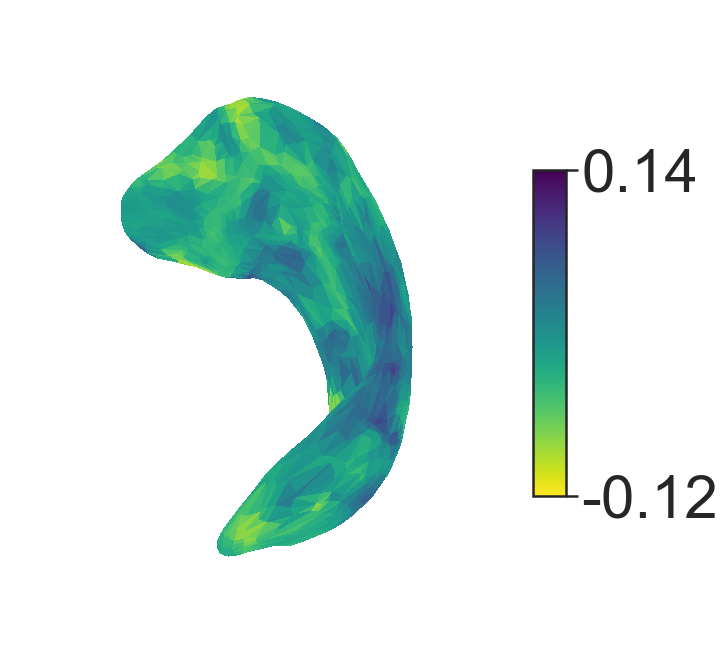

In [74]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                   plot_funcs.yRCA, 
                                   plot_funcs.zRCA, 
                                   plot_funcs.triRCA, 
                                   R_ALL,
                                   'viridis_r',
                                   R_ALL.min(), R_ALL.max())


#fig.savefig('../figures/nodewise_r_T_g2_rca.png',
#            format='png',dpi=300)

### G2 RDG and T1w-T2w

In [75]:
mysubjects = []

for subj in subjlist:
    mysubjects.append(subj)
print(len(mysubjects))

tot_node_num = 1024
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))
node_str[0], '....', node_str[-1]

mycols = node_str

df = pd.DataFrame(index = mysubjects,
                 columns = mycols)
df.index.name = 'id'

dg = pd.DataFrame(index = mysubjects,
                 columns = mycols)
dg.index.name = 'id'

709
1024


In [76]:
ddir = '../data/bladesMniGifti_T1wT2w/'
gdir = '../data/tout_hippoc_grad_flipped/'

for subjID in mysubjects:

    iC = df.index.get_loc(subjID)    
    vol2hipp  = os.path.join(ddir, 'HCP_%s_R_DG_skelFinal.shape.gii' % (subjID))
    df.iloc[iC][node_str] = nb.load(vol2hipp).agg_data()
    
    iG = dg.index.get_loc(subjID)    
    gfile = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_RDG.h5'), 'r')
    g = np.array(gfile[subjID])  
    gfile.close()
    dg.iloc[iG][node_str] = g
    
    


In [77]:
R_ALL = np.zeros((tot_node_num,))
P_ALL = np.zeros((tot_node_num,))

j = 0
for node_j in node_str:
    R_ALL[j] = pearsonr(df[node_j], dg[node_j])[0]
    P_ALL[j] = pearsonr(df[node_j], dg[node_j])[1]

    j += 1

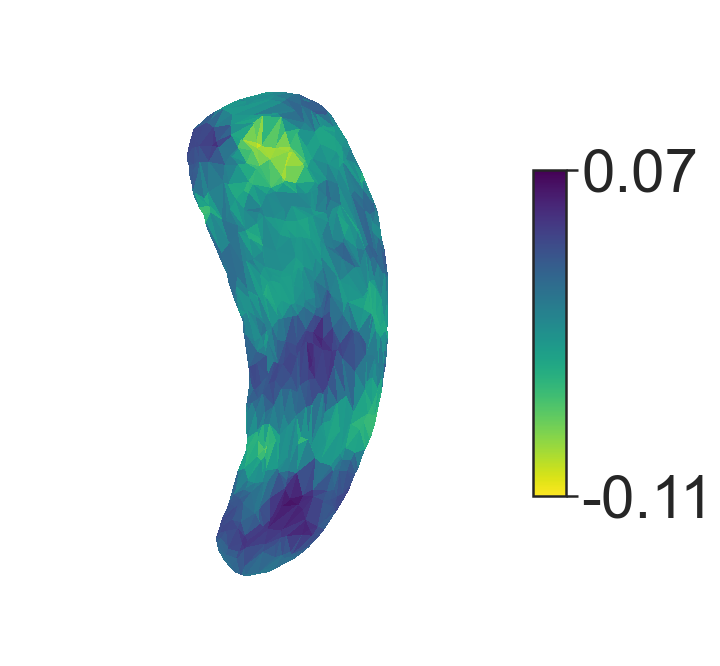

In [78]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRDG, 
                                   plot_funcs.yRDG, 
                                   plot_funcs.zRDG, 
                                   plot_funcs.triRDG, 
                                   R_ALL,
                                   'viridis_r',
                                   R_ALL.min(), R_ALL.max())


#fig.savefig('../figures/nodewise_r_T_g2_rdg.png',
#            format='png',dpi=300)